**Juan felipe zapata arenas 1214748144**


Deducción, solución, animación y comparación de la órbita de mercurio utilizando mecánica newtoniana y  mecánica relativista. 

**Planteamiento del problema**

La descripción de la órbita de mercurio, en especial la anomalía en la preseción de su perihelio, fue un gran problema para los astrónomos, que ni siquiera con la gravedad newtoniana, la mejor teoría para la época se podia explicar, incluso en 1869 Urbain Le Verrier recurrió a la hipótesis de un planeta llamado vulcano que estaba entre mercurio y el sol para poder explicar esta anomalía. Los cálculos basados en la mecánica clásica dan como resultado una precesión de 531 segundos de arco por siglo

Más de 250 años duró este problema, hasta la llegada de la teoría de la relatividad general, esta permitió modelar de manera adecuada una órbita tan complicada, convirtiéndose este hecho en una de las primeras demostraciones de que la teoría de la relatividad general es un modelo extremadamente preciso del fenómeno gravitatorio. 


**Objetivos**

1) Encontrar la ecuación de órbita newtoniana para mercurio, solucionarla y animarla

2) Encontrar la ecuación de órbita relativista para mercurio, solucionarla y animarla

3) Comparar las dos soluciones 


In [206]:
%matplotlib notebook

import numpy as np
from numpy import *
from math import *
from numpy.linalg import *
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation

from numpy import *
from scipy.integrate import odeint 
import matplotlib.pyplot as plt
import matplotlib


plt.rcParams['figure.figsize'] = 10, 6 #ancho, alto
font = {'weight' : 'bold',
        'size'   : 15}

matplotlib.rc('font', **font)


**En todo el análisis del problema sólo consideramos la interacción gravitacional entre mercurio y el sol, las demás perturbaciones aunque son importantes para describir la órbita no se tienen en cuenta.**

# **Versión Newtoniana**

Consideremos el movimineto de mercurio en un plano, tal que los vectores unitarios en coordenadas polares están relacionados con la base cartesiana de acuerdo a la siguiente ecuación:


\begin{align}
    \left\{ \begin{matrix} 
    \hat{r}=\cos \theta \hat{i}+\sin \theta \hat{j}\\
    \hat{\theta}=-\sin \theta \hat{i}+\cos \theta \hat{j}
    \end{matrix}\right.
\end{align}


\begin{align}
    \left\{ \begin{matrix} 
   \dot{ \hat{r}}=\dot{\theta} \hat{\theta}\\
    \dot{\hat{\theta}}=-\dot{\theta}\hat{r}
    \end{matrix}\right.
\end{align}


\begin{align}
    \left\{ \begin{matrix} 
   \vec{r}=r \hat{r}\\
   \vec{v}=\dot{\vec{r}}=\dot{r}\hat{r}+r\dot{\hat{r}}=\dot{r}\hat{r}+r\dot{\theta} \hat{\theta} \rightarrow |\vec{v}|^2=\dot{r}^2+r^2\dot{\theta}^2
    \end{matrix}\right.
\end{align}

El momento angular para este movimiento es una constante:


\begin{align}
    \vec{L}=\vec{r}\times \vec{p}=m \left[\vec{r}\times \dot{\vec{r}}\right]=m \left[\vec{r}\times \left( \dot{r}\hat{r}+r\dot{\theta} \hat{\theta}\right)\right]=mr^2\dot{\theta}\hat{k}=L \hat{k}
\end{align}

La energía también es constante :

\begin{align}
    E&=T+V=\frac{1}{2}m |\vec{v}|^2-G \frac{Mm}{r} \\&=\frac{1}{2}m \left(\dot{r}^2+r^2\dot{\theta}^2 \right)-G \frac{Mm}{r} \\&=\frac{1}{2}m \left(\dot{r}^2+\frac{L^2}{m^2r^2} \right)-G \frac{Mm}{r}
\end{align}

En donde podemos ver una energía potencial efectiva $V_{eff}$:

\begin{align}
    V_{eff}=\frac{L^2}{2mr^2}-G \frac{Mm}{r}
\end{align}

Derivemos respecto al tiempo la energía:

\begin{align}
   0=\frac{dE}{dt}&=\frac{1}{2}m\frac{d}{dt} \dot{r}^2(t)+\frac{d}{dt} V(r)_{eff} \\&=m \ddot{r} \dot{r}+\frac{\partial (V_{eff})}{\partial r} \dot{r}
\end{align}

De donde obtenemos:

\begin{align}
    m\ddot{r}=-\frac{\partial (V_{eff})}{\partial r}
\end{align}

\begin{align}
    m\ddot{r}=\frac{L^2}{mr^3}-G\frac{Mm}{r^2}
\end{align}
Realicemos el siguiente cambio de variable: 

\begin{align}
    r=\frac{1}{u(\theta)}
\end{align}

\begin{align}
   \dot{r}= \frac{dr}{dt}&= \frac{d\frac{1}{u(\theta)}}{dt}=\frac{\partial\frac{1}{u(\theta)}}{\partial \theta} \dot{\theta}=-\frac{1}{u^2}\frac{du}{d\theta}\dot{\theta}\\&=-\frac{1}{u^2}\frac{du}{d \theta}\frac{L}{mr^2}=-\frac{1}{u^2}\frac{du}{d \theta}\frac{L}{m}u^2 \\&=-\frac{du}{d \theta}\frac{L}{m}
\end{align}

Ahora hallemos la segunda derivada respeto al tiempo:



\begin{align}
  \ddot{r}&=\frac{d}{dt} \left( \frac{dr}{dt}\right)=\frac{d}{dt} \left(-\frac{L}{m}\frac{du}{d \theta}\right)  \\&=-\frac{L}{m}\frac{d}{dt}\left( \frac{du}{d\theta}\right)\\&= -\frac{L}{m}\frac{d}{d \theta}\left( \frac{du}{d\theta}\right) \frac{d \theta}{dt}\\&= -\frac{L}{m}\frac{d^2 u}{d \theta^2} \dot{\theta}=-\frac{L^2}{m^2}u^2 \frac{d^2 u}{d \theta^2}
\end{align}


Reemplazando este cambio de variable en la ecuación

\begin{align}
    m\ddot{r}=\frac{L^2}{mr^3}-G\frac{Mm}{r^2}
\end{align}

Tenemos:

\begin{align}
 &m\left(-\frac{L^2}{m^2}u^2 \frac{d^2 u}{d \theta^2}\right)=\frac{L^2}{m}u^3-GMmu^2 \\&-\frac{L^2}{m}\frac{d^2u}{d\theta^2}=\frac{L^2}{m}u-GMm    
\end{align}
Obteniéndose finalmente la ecuación de la órbita, conocida como la ecuación de Binet:


\begin{align}
   \boxed{ \frac{d^2 u}{d\theta^2}+u=G\frac{Mm^2}{L^2}}
\end{align}


Los datos como masa del sol, masa de mercurio, momento angular de mercurio, constante gravitacional, afelio de mercurio, rapidéz de la luz y excentricidad de la órbita fueron consultados en la literatura referenciada. 

**Solución:**

In [207]:
##condiciones iniciales
n=15 #número de años mercurianos
M=1.989e30 #Kg
m=3.302e23 #kg
L=8.9613e38
G=6.67408e-11
afel=69816877462.0779 #metros
c=299792458
e=0.20563069
u0,v0=[1/afel,0] ##condiciones iniciales en el perihelio 

In [208]:
def binet1(A,t):
    u,v=A
    return[v,-u+((G*M*m**2)/(L**2))]

f0=[u0,v0] #condiciones iniciales
t=linspace(0,2*np.pi*n,800)
sol=odeint(binet1,f0, t)

r=1/sol[:,0]
r=L**2/(G*M*m**2*(1-e*np.cos(t)))

x=r*np.cos(t)
y=r*np.sin(t)

<IPython.core.display.Javascript object>


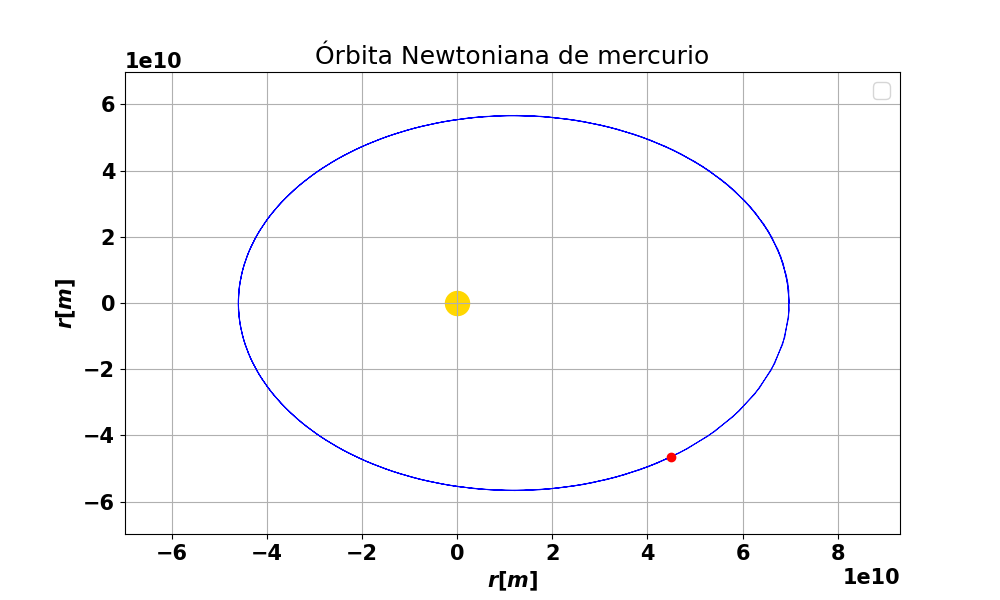

In [209]:
%matplotlib notebook

#Datos para graficar


#Gráfica
fig1=plt.figure()
ax=fig1.gca()


#Función de actualización

def actualizar1(i): 
    ax.clear()
   
    ax.plot(x[:i+1],y[:i+1],'b-',lw=0.7)
    ax.plot(x[i],y[i],'ro')
    plt.scatter(0,0,marker='o',color='gold',s=300)
    plt.xlim(-afel,afel+afel/3) #para que no varíen los ejes
    plt.ylim(-afel,afel)
    plt.xlabel('$r[m]$')
    plt.ylabel('$r[m]$')
    plt.legend()
    plt.title('Órbita Newtoniana de mercurio')
    plt.grid()
#Animación 

ani1=animation.FuncAnimation(fig1,actualizar1,range(len(t)), interval=1, repeat=False)
#en donde está range se ponen los datos para meter en actualizar
#interval está en milisegundos, cada k milisegundos crea la gráfica
plt.show()

En la animación anterior podemos ver que la órbita newtoniana de mercurio es una trayectoria que se maniene en el tiempo, es decir, cada año mercurio pasa por la misma posición respecto al sol. La ecuación de la órbita que hallamos no da cuenta de la preseción de mercurio que se observa experimentalmente. 

Debo aclarar que con mecánica clásica sí se predice una precesión, cuando se tiene en cuanta la acción gravitatoria de mercurio con los demás planetas, pero no es la observada.

# Versión Relativista

Vamos a utilizar coordenadas esféricas, tales que $\theta$ la coordenada cenital es $\frac{\pi}{2}$ en todo momento, en la deducción de la órbita newtoniana $\theta$ era la coordenada azimutal, que en este caso será $\phi$, La métrica de Schwarzshild con la condición de que $\theta=\frac{\pi}{2}$ es:

\begin{align}
    g_{\mu\nu}=\begin{bmatrix} 
   -\left(1-\frac{2GM}{c^2r} \right) &0&0&0\\
    0&\left( 1-\frac{2GM}{c^2r} \right)^{-1}&0&0\\
    0&0&r^2&0\\
    0&0&0&r^2
    \end{bmatrix}
\end{align}



El tiempo propio $\tau$ lo tomamos  en un sistema fijo en mercurio. A partir de la métrica definimos la siguiente cantidad: 

\begin{align}
    -c^2 (d\tau)^2&=ds^2=g_{\mu \nu} dx^{\mu} dx^{\nu} =-c^2 \left(1-\frac{2GM}{c^2r} \right) \left(dt \right)^2+ \left(1-\frac{2GM}{c^2r} \right)^{-1} \left(dr \right)^2 +r^2 \left(d\phi \right)^2 + r^2 \left(d\theta \right)^2
\end{align}


\begin{align}
    -c^2&=-c^2 \left(1-\frac{2GM}{c^2r} \right) \left(\frac{dt}{d\tau} \right)^2+ \left(1-\frac{2GM}{c^2r} \right)^{-1} \left(\frac{dr}{d\tau} \right)^2+r^2 \left( \frac{d\phi}{d\tau} \right)^2 + r^2 \left( \frac{d\theta}{d\tau} \right)^2
\end{align}

Utilizando la definición del momento angular relativista $J$ y la energía relativista como cantidades conservadas a partir de los vectores de killing tenemos que:

\begin{align}
    &mu^0g_{00}=-\frac{E}{c} \\
    &mu^3g_{33}=J
\end{align}
en donde

\begin{align}
    u^{\alpha}=\frac{d x^{\alpha}}{d \tau}
\end{align}
De esto tenemos las siguientes expresiones:

\begin{align}
    m \frac{d(ct)}{d\tau} \left[  -\left(1-\frac{2GM}{c^2r} \right) \right]=-\frac{E}{c}
\end{align}

Despejando $\frac{dt}{d\tau}$:

\begin{align}
   \boxed{ \frac{dt}{d\tau}=\frac{E}{mc^2} \left(1-\frac{2GM}{rc^2} \right)^{-1}}
\end{align}


Para $J$ tenemos:

 
\begin{align}
    m \frac{d \phi}{ d \tau} r^2=J
\end{align}

   Despejando $\frac{d \phi}{ d \tau}$:
    
   \begin{align}
        \boxed{\frac{d \phi}{ d \tau}=\frac{J}{mr^2}}
    \end{align}


 Reemplacemos estos diferenciales en la expresión para $-c^2$:

  
    
  \begin{align}
    -c^2&=-c^2 \left(1-\frac{2GM}{c^2r} \right) \left(\frac{E}{mc^2} \left(1-\frac{2GM}{rc^2} \right)^{-1} \right)^2 + \left(1-\frac{2GM}{c^2r} \right)^{-1} \left(\frac{dr}{d\tau} \right)^2 +r^2 \left(\frac{J}{mr^2} \right)^2 
\end{align}


  \begin{align}
    -c^2&=-\frac{E^2}{m^2c^2} \left(1-\frac{2GM}{c^2r} \right)^{-1}+ \left(1-\frac{2GM}{c^2r} \right)^{-1} \left(\frac{dr}{d\tau} \right)^2 + \frac{J^2}{m^2r^2} 
\end{align}


  \begin{align}
    -c^2\left(1-\frac{2GM}{c^2r} \right)&=-\frac{E^2}{m^2c^2}+\left(\frac{dr}{d\tau} \right)^2 +\frac{J^2}{m^2r^2}  \left(1-\frac{2GM}{c^2r} \right)
\end{align}









(*)
  \begin{align}
 &\left(\frac{dr}{d\tau} \right)^2 +\frac{J^2}{m^2r^2}  \left(1-\frac{2GM}{c^2r} \right)-\frac{2GM}{r}=c^2 \left[\left( \frac{E}{m^2c^2}\right)^2 -1\right]
\end{align}



\begin{align}
    &\frac{1}{2}m\left(\frac{dr}{d\tau} \right)^2+\frac{J^2}{2mr^2}\left( 1-\frac{2MG}{rc^2}\right)-\frac{GMm}{r} =\frac{mc^2}{2}\left[ \left( \frac{E}{m^2c^2}\right)^2-1\right]
\end{align}


La ecuación anterior es una ecuación de energía:

\begin{align}
    V_{eff}=\frac{J^2}{2mr^2}\left( 1-\frac{2MG}{rc^2}\right)-\frac{GMm}{r}
\end{align}



Realizando el siguiente reemplazo en la ecuación (*) tenemos:

\begin{align}
    \frac{dr}{d\tau}= \frac{dr}{d\phi}  \frac{d \phi}{d\tau}=\frac{dr}{d\phi}  \frac{J}{mr^2}
\end{align}



  \begin{align}
 &\left(\frac{dr}{d\phi}  \frac{J}{mr^2} \right)^2 +\frac{J^2}{m^2r^2}  \left(1-\frac{2GM}{c^2r} \right)-\frac{2GM}{r}=c^2 \left[\left( \frac{E}{m^2c^2}\right)^2 -1\right]
\end{align}

\begin{align}
 &\left(\frac{dr}{d\phi} \right)^2 +r^2 \left(1-\frac{2GM}{c^2r} \right)-m^2r^3\frac{2GM}{J^2}=\left(\frac{mcr^2}{J} \right)^2 \left[\left( \frac{E}{m^2c^2}\right)^2 -1\right] \label{23}
\end{align}

Realicemos el siguiente cambio de variable:


\begin{align}
    r=\frac{1}{u(\phi)}
\end{align}

\begin{align}
    \left(\frac{dr}{d\phi} \right)^2= \left(\frac{d \frac{1}{u}}{d\phi} \right)^2= \left(-\frac{1}{u^2} \frac{du}{d\phi}\right)^2=\frac{1}{u^4} \left(\frac{du}{d\phi} \right)^2
\end{align}

Reemplacemos esto en la ecuación:

\begin{align}
        \frac{1}{u^4} \left(\frac{du}{d\phi} \right)^2+\frac{1}{u^2}-\frac{2GM}{uc^2}-m^2 \frac{2GM}{J^2}\frac{1}{u^3}=\left( \frac{mc}{J}\right)^2 \left[\left(\frac{E}{m^2c^2} \right)^2-1 \right]\frac{1}{u^4}
    \end{align}
    
    
\begin{align}
        \left(\frac{du}{d\phi} \right)^2+u^2-\frac{2GMu^3}{c^2}-m^2 \frac{2GM}{J^2}u=\left( \frac{mc}{J}\right)^2 \left[\left(\frac{E}{m^2c^2} \right)^2-1 \right]
    \end{align}
   
    
    
\begin{align}
        \left(\frac{du}{d\phi} \right)^2+u^2=\left( \frac{mc}{J}\right)^2 \left[\left(\frac{E}{m^2c^2} \right)^2-1 \right]+\frac{2GMu^3}{c^2}+m^2 \frac{2GM}{J^2}u
    \end{align}
    
  Derivando respecto  $\phi$ la ecuación anterior se tiene la ecuación de la órbita, llamada ecuación de Binet relativista:
  \begin{align}
    \boxed{\frac{d^2 u}{d \phi^2}+u=\frac{3GM}{c^2}u^2+\frac{GMm^2}{J^2}}
\end{align}

**Solución**

In [210]:
def binet2(A,t):
    u,v=A
    return[v,-u+3*G*(M/c**2)*u**2+G*M*m**2/L**2]

t=linspace(0,2*n*np.pi,800)
f02=[u0,v0] #condiciones iniciales

sol2=odeint(binet2,f02,t)

r2=1/sol2[:,0]

r2=L**2/(G*M*m**2*(1-e*np.cos(t*0.99)))
x2=r2*np.cos(t)
y2=r2*np.sin(t)

No handles with labels found to put in legend.


Traceback (most recent call last):
  File "c:\users\juan felipe zapata\desktop\lib\site-packages\matplotlib\cbook\__init__.py", line 196, in process
    func(*args, **kwargs)
  File "c:\users\juan felipe zapata\desktop\lib\site-packages\matplotlib\animation.py", line 1467, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


<IPython.core.display.Javascript object>


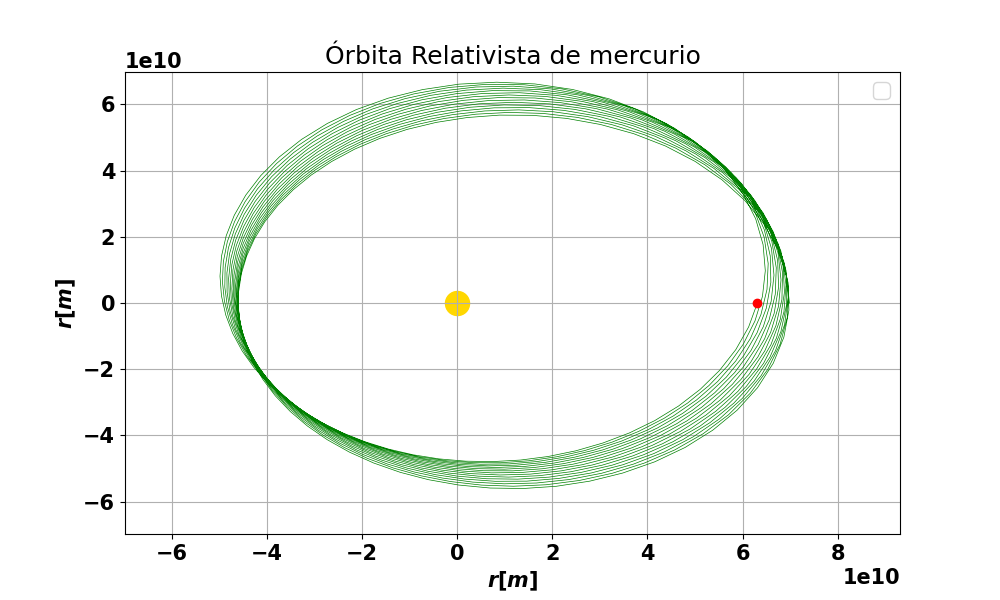

In [211]:
%matplotlib notebook

#Datos para graficar


#Gráfica
fig1=plt.figure()
ax=fig1.gca()


#Función de actualización

def actualizar1(i): 
    ax.clear()
       
    ax.plot(x2[:i+1],y2[:i+1],'g-',lw=0.5)
    ax.plot(x2[i],y2[i],'ro')
    plt.scatter(0,0,marker='o',color='gold',s=300)
    plt.xlim(-afel,afel+afel/3) #para que no varíen los ejes
    plt.ylim(-afel,afel)
    plt.xlabel('$r[m]$')
    plt.ylabel('$r[m]$')
    plt.legend()
    plt.title('Órbita Relativista de mercurio')
    plt.grid()
#Animación 

ani1=animation.FuncAnimation(fig1,actualizar1,range(len(t)), interval=1, repeat=False)
#en donde está range se ponen los datos para meter en actualizar
#interval está en milisegundos, cada k milisegundos crea la gráfica
plt.show()

En la animación anterior podemos ver como la órbita de mercurio, a medida que pasan los años mercurianos no tiene la misma posición respecto al sol. esto se conoce como preseción y fue un fenómemo que no se pudo modelar adecuadamente con mecánica newtoniana, fue sino hasta la relatividad general que se pudo tener un modelo preciso de este movimiento planetario. 

# Comparación

<IPython.core.display.Javascript object>


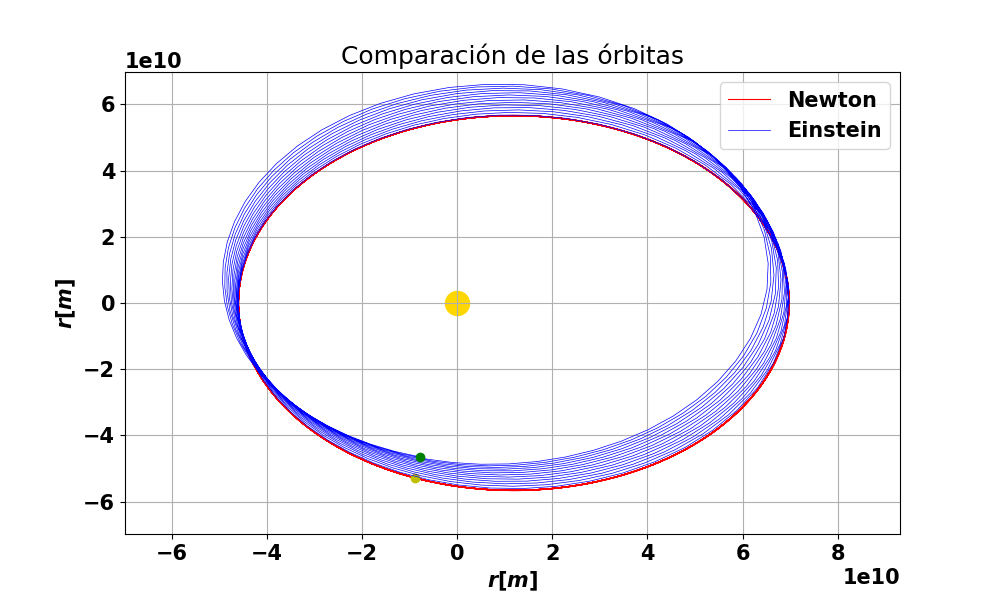

In [216]:
%matplotlib notebook

#Datos para graficar


#Gráfica
fig1=plt.figure()
ax=fig1.gca()


#Función de actualización

def actualizar1(i): 
    ax.clear()
    
    
    ax.plot(x[:i+1],y[:i+1],'r-',lw=0.8, label='Newton')
    ax.plot(x[i],y[i],'yo')
    ax.plot(x2[:i+1],y2[:i+1],'b-',lw=0.5,label='Einstein')
    ax.plot(x2[i],y2[i],'go')
    plt.scatter(0,0,marker='o',color='gold',s=300)
    plt.xlim(-afel,afel+afel/3) #para que no varíen los ejes
    plt.ylim(-afel,afel)
    plt.xlabel('$r[m]$')
    plt.ylabel('$r[m]$')
    plt.legend()
    plt.title('Comparación de las órbitas')
    plt.grid()
#Animación 

ani1=animation.FuncAnimation(fig1,actualizar1,range(len(t)), interval=1, repeat=False)
#en donde está range se ponen los datos para meter en actualizar
#interval está en milisegundos, cada k milisegundos crea la gráfica
plt.show()

Podemos ver que inicialmente las órbitas coindicen pero a medida que pasa el tiempo la órbita relativista inicia su preseción. 

**Perspectivas para continuación del trabajo**

1) Estudiar la órbita teniendo en cuenta la interacción con otros cuerpos celestes


2) Introducir la rotación de mercurio  y  de los demás planetas al modelo orbital 


**Referencia**

1. Quispe Rodriguez, Alex Rossi. "Modelado de la precesión en la órbita de mercurio con Matlab tomando la teoría newtoniana y relativista."Universidad Nacional de Altiplano. (2019).